In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True, reshape=False)
print(mnist)
import tensorflow as tf


Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Datasets(train=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x0000021E2CA20978>, validation=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x0000021E26082550>, test=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x0000021E2C9D5BA8>)


In [3]:
# Parameters
learning_rate = 0.001
training_epochs = 750
batch_size = 1000  # Decrease batch size if you don't have enough memory
display_step = 1

n_input = 784  # MNIST data input (img shape: 28*28)
n_classes = 10  # MNIST total classes (0-9 digits)

n_hidden_layer = 256 # layer number of features

In [4]:
# Store layers weight & bias
weights = {
    'hidden_layer': tf.Variable(tf.random_normal([n_input, n_hidden_layer])),
    'out': tf.Variable(tf.random_normal([n_hidden_layer, n_classes]))
}
biases = {
    'hidden_layer': tf.Variable(tf.random_normal([n_hidden_layer])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}

In [5]:
# tf Graph input
x = tf.placeholder("float", [None, 28, 28, 1])
y = tf.placeholder("float", [None, n_classes])
x_flat = tf.reshape(x, [-1, n_input])

In [6]:
# Hidden layer with RELU activation
layer_1 = tf.add(tf.matmul(x_flat, weights['hidden_layer']), biases['hidden_layer'])
layer_1 = tf.nn.relu(layer_1)

In [7]:
# Output layer with linear activation
logits = tf.matmul(layer_1, weights['out']) + biases['out']

In [8]:
# Define loss and optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)

In [9]:
# Initializing the variables
init = tf.global_variables_initializer()

In [10]:
# Launch the graph
with tf.Session() as sess:
    sess.run(init)
    # Training cycle
    for epoch in range(training_epochs):
        total_batch = int(mnist.train.num_examples/batch_size)
        # Loop over all batches
        for i in range(total_batch):
            batch_x, batch_y = mnist.train.next_batch(batch_size)
            # Run optimization op (backprop) and cost op (to get loss value)
            sess.run(optimizer, feed_dict={x: batch_x, y: batch_y})
        # Display logs per epoch step
        if epoch % display_step == 0:
            c = sess.run(cost, feed_dict={x: batch_x, y: batch_y})
            print("Epoch:", '%04d' % (epoch+1), "cost=", \
                "{:.9f}".format(c))
    print("Optimization Finished!")
    
    
    pred = tf.nn.softmax(logits)  # Apply softmax to logits
    
    correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
    #print(a)
    # Calculate accuracy
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    print("Accuracy:", accuracy.eval({x: mnist.test.images, y: mnist.test.labels}))
    #print(confusion_matrix(np.argmax(pred),np.argmax(mnist.test.labels)))
    
    confusionmatrix = tf.contrib.metrics.confusion_matrix(tf.argmax(y,1),tf.argmax(pred,1))
    print('Confusion Matrix: \n\n', tf.Tensor.eval(confusionmatrix,feed_dict={x: mnist.test.images, y: mnist.test.labels}, session=None))

Epoch: 0001 cost= 107.527488708
Epoch: 0002 cost= 86.997375488
Epoch: 0003 cost= 73.196502686
Epoch: 0004 cost= 64.536163330
Epoch: 0005 cost= 53.755172729
Epoch: 0006 cost= 55.306186676
Epoch: 0007 cost= 46.184608459
Epoch: 0008 cost= 41.560195923
Epoch: 0009 cost= 38.370239258
Epoch: 0010 cost= 34.927829742
Epoch: 0011 cost= 30.905714035
Epoch: 0012 cost= 31.927227020
Epoch: 0013 cost= 30.295116425
Epoch: 0014 cost= 26.523960114
Epoch: 0015 cost= 27.408235550
Epoch: 0016 cost= 24.156461716
Epoch: 0017 cost= 23.405662537
Epoch: 0018 cost= 23.447618484
Epoch: 0019 cost= 22.838943481
Epoch: 0020 cost= 21.490678787
Epoch: 0021 cost= 21.247123718
Epoch: 0022 cost= 19.118503571
Epoch: 0023 cost= 19.892320633
Epoch: 0024 cost= 17.942302704
Epoch: 0025 cost= 17.934659958
Epoch: 0026 cost= 18.794586182
Epoch: 0027 cost= 16.868349075
Epoch: 0028 cost= 16.116867065
Epoch: 0029 cost= 18.896085739
Epoch: 0030 cost= 16.224451065
Epoch: 0031 cost= 13.939304352
Epoch: 0032 cost= 15.440347672
Epoch: 

Epoch: 0272 cost= 5.416567326
Epoch: 0273 cost= 4.896425724
Epoch: 0274 cost= 4.986403942
Epoch: 0275 cost= 6.019890785
Epoch: 0276 cost= 5.129796982
Epoch: 0277 cost= 6.018101215
Epoch: 0278 cost= 4.531816483
Epoch: 0279 cost= 4.276238441
Epoch: 0280 cost= 5.271668911
Epoch: 0281 cost= 4.229547024
Epoch: 0282 cost= 5.873401165
Epoch: 0283 cost= 4.654130936
Epoch: 0284 cost= 4.674829006
Epoch: 0285 cost= 4.854630947
Epoch: 0286 cost= 4.799792290
Epoch: 0287 cost= 6.134225845
Epoch: 0288 cost= 5.296751976
Epoch: 0289 cost= 5.037463665
Epoch: 0290 cost= 5.378603458
Epoch: 0291 cost= 4.370654583
Epoch: 0292 cost= 4.074785233
Epoch: 0293 cost= 3.306828499
Epoch: 0294 cost= 5.282517433
Epoch: 0295 cost= 4.653985023
Epoch: 0296 cost= 4.772105694
Epoch: 0297 cost= 3.989167929
Epoch: 0298 cost= 5.201617241
Epoch: 0299 cost= 4.544055939
Epoch: 0300 cost= 4.784436703
Epoch: 0301 cost= 4.854959011
Epoch: 0302 cost= 4.300823212
Epoch: 0303 cost= 3.615154743
Epoch: 0304 cost= 4.842308044
Epoch: 030

Epoch: 0546 cost= 2.657253027
Epoch: 0547 cost= 3.266656160
Epoch: 0548 cost= 3.207323790
Epoch: 0549 cost= 3.434875965
Epoch: 0550 cost= 2.877477884
Epoch: 0551 cost= 2.559097052
Epoch: 0552 cost= 3.849099159
Epoch: 0553 cost= 3.394502878
Epoch: 0554 cost= 2.812922716
Epoch: 0555 cost= 3.352003098
Epoch: 0556 cost= 3.314807415
Epoch: 0557 cost= 3.342978477
Epoch: 0558 cost= 3.821877956
Epoch: 0559 cost= 3.140659332
Epoch: 0560 cost= 2.929201126
Epoch: 0561 cost= 3.966383219
Epoch: 0562 cost= 2.739074707
Epoch: 0563 cost= 3.207208395
Epoch: 0564 cost= 3.296145439
Epoch: 0565 cost= 3.496107340
Epoch: 0566 cost= 2.624471426
Epoch: 0567 cost= 4.522905350
Epoch: 0568 cost= 2.987708569
Epoch: 0569 cost= 3.316957712
Epoch: 0570 cost= 3.186021566
Epoch: 0571 cost= 3.495987892
Epoch: 0572 cost= 3.348902941
Epoch: 0573 cost= 3.565889597
Epoch: 0574 cost= 4.176180840
Epoch: 0575 cost= 3.166515350
Epoch: 0576 cost= 3.373075724
Epoch: 0577 cost= 3.077537537
Epoch: 0578 cost= 3.660126209
Epoch: 057

In [12]:
import matplotlib
import matplotlib.pyplot as plt

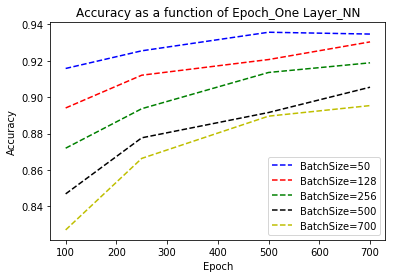

In [13]:
X = ([100, 250, 500, 700])
Y_50 = ([0.9158, 0.9255, 0.9357, 0.9347])
Y_128 = ([0.8941, 0.9121, 0.9207, 0.9304])
Y_256 = ([0.8720, 0.8937, 0.9136, 0.9189])
Y_500 = ([0.8469, 0.8777, 0.8916, 0.9055])
Y_700 = ([0.8271, 0.8664, 0.8896, 0.8954])

plt.plot(X,Y_50,'b--', label = "BatchSize=50")
plt.plot(X,Y_128,'r--', label = "BatchSize=128")
plt.plot(X,Y_256,'g--', label = "BatchSize=256")
plt.plot(X,Y_500,'k--', label = "BatchSize=500")
plt.plot(X,Y_700,'y--', label = "BatchSize=700")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy as a function of Epoch_One Layer_NN')
plt.legend(loc = "best")
plt.show()